# IPL 2022 Capstone Project

The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

These are some of the important columns that we'll focus on for meaningful insights in this project.

**column names: Variable Type**

- date : string  
- venue : string  
- stage : string  
- team1 : string  
- team2 : string  
- toss_winner : string  
- toss_decision : string  
- first_ings_score : integer  
- second_ings_score : integer  
- match_winner : string  
- won_by : string  
- margin : integer  
- player_of_the_match : string  
- top_scorer : string  
- highscore : integer  
- best_bowling : string  
- best_bowling_figure : string  
- gure : string  

## Loading the Libraries and Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('IPL.csv')

df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


## **Basic**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

check the size of rows and column of the dataset

In [7]:
print(f'your rows are {df.shape[0]} and your cols are {df.shape[1]}') # => shows the total rows and column

your rows are 74 and your cols are 20


Now let's see how many cols have null values in total

In [8]:
# df.null => show null vals in form of true or false
df.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


1. which team won the most matches

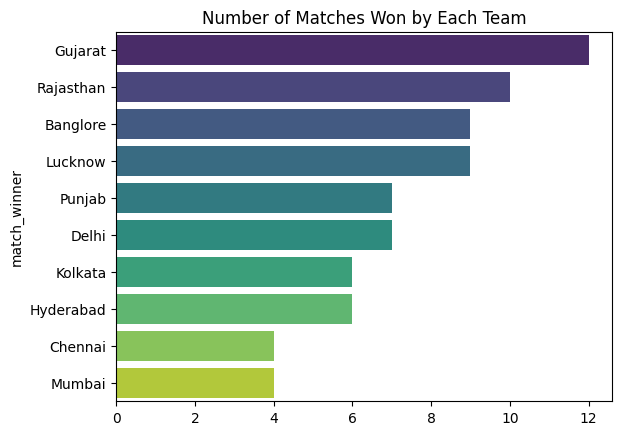

In [9]:
match_wins = df['match_winner'].value_counts()
sns.barplot(y=match_wins.index, x = match_wins.values , palette='viridis')
plt.title('Number of Matches Won by Each Team')
plt.show()

2. Toss decision Trends

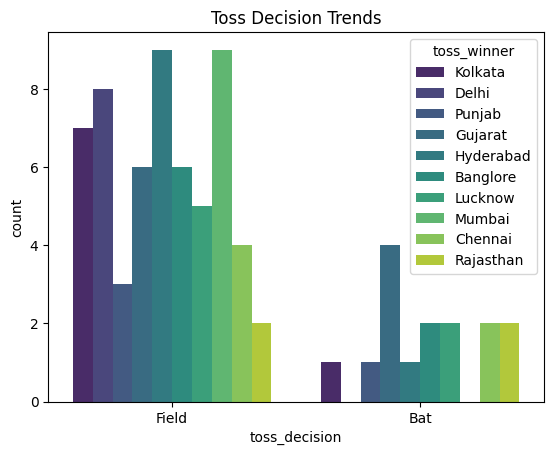

In [10]:
sns.countplot(x=df['toss_decision'], hue='toss_winner', data=df, palette='viridis')
plt.title('Toss Decision Trends')
plt.show()

3. Toss winner vs the match winner

In [18]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count / df['match_id'].count()) * 100
print(percentage.round(2))

48.65


4. How do teams win? { Run vs Wickets }

Text(0.5, 1.0, 'How do teams win')

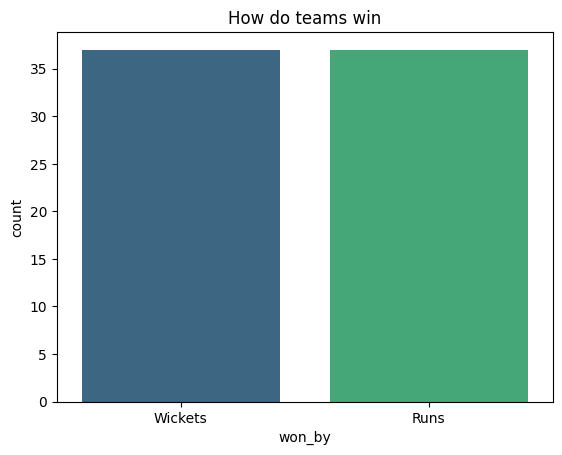

In [25]:
sns.countplot(x = df['won_by'] , data=df, palette='viridis')
plt.title('How do teams win')

# key player of the match
1 most Player of the match

In [33]:
counts = df['player_of_the_match'].value_counts().head(10)
print(counts)

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64


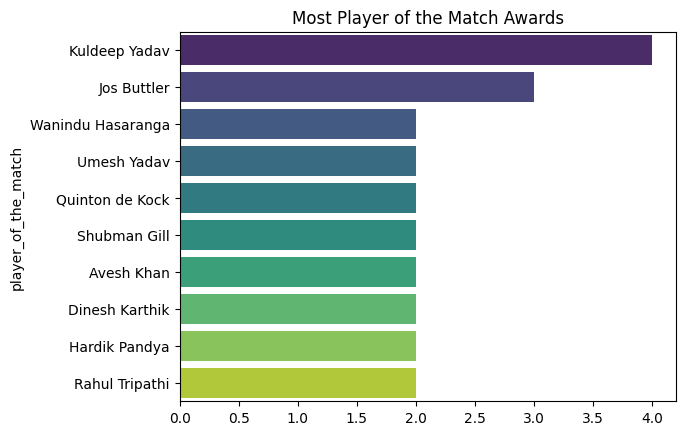

In [46]:
sns.barplot(y=counts.index, x=counts.values, palette='viridis')
plt.title("Most Player of the Match Awards")
plt.show()

2 top scorers

In [51]:
# df.top_scorer.value_counts().head(2)
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

,highscore
top_scorer,
Jos Buttler,651
Quinton de Kock,377


Text(0.5, 1.0, 'Top Scorers')

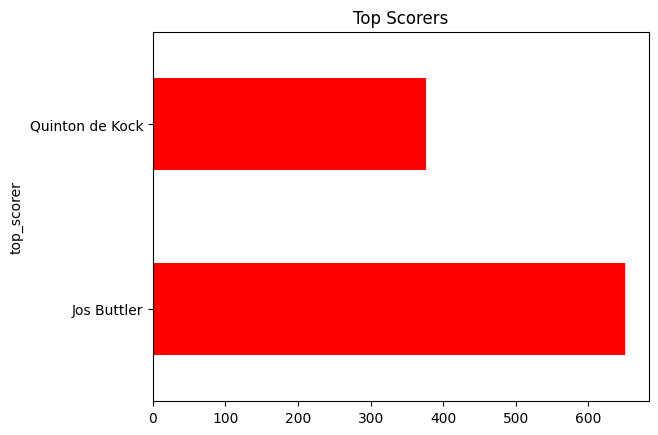

In [56]:
high.plot(kind='barh', color='red')
plt.title('Top Scorers')

10 best bowling figures

In [65]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers

,highest_wickets
best_bowling,
Yuzvendra Chahal,17
Jasprit Bumrah,11
Kuldeep Yadav,11
Rashid Khan,11
Josh Hazlewood,10
Kagiso Rabada,10
Avesh Khan,10
Umran Malik,9
Wanindu Hasaranga,9


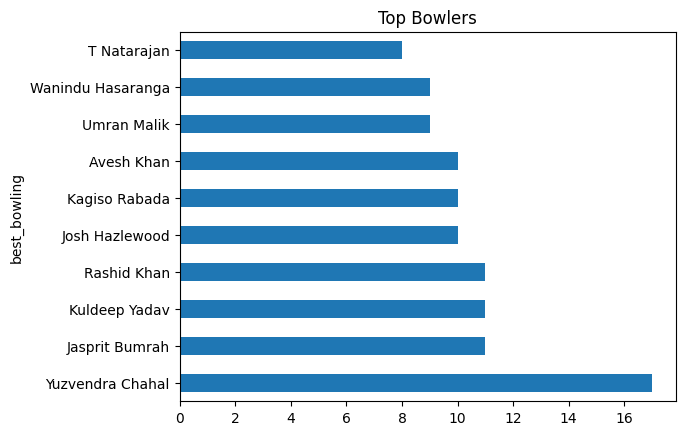

In [74]:
top_bowlers.plot(kind='barh')
plt.title('Top Bowlers')
plt.show()